<a href="https://colab.research.google.com/github/GamelinAl/mbtrack2_examples/blob/main/ESRF_EBS_coupled_bunch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://gitlab.synchrotron-soleil.fr/PA/collective-effects/mbtrack2.git

Cloning into 'mbtrack2'...
remote: Enumerating objects: 1202, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 1202 (delta 93), reused 143 (delta 70), pack-reused 1025
Receiving objects: 100% (1202/1202), 489.12 KiB | 886.00 KiB/s, done.
Resolving deltas: 100% (797/797), done.


In [2]:
%cd mbtrack2

/content/mbtrack2


# Define ring with ESRF-EBS parameters

In [3]:
import numpy as np
from mbtrack2.tracking import Synchrotron, Electron
from mbtrack2.utilities import Optics

In [4]:
def ESRF_EBS():
    
    h = 992
    L = 843.977
    E0 = 6e9
    particle = Electron()
    ac = 8.5e-5
    U0 = 2.5e6
    tau = np.array([8.76e-3, 13.4e-3, 9.13e-3])
    tune = np.array([76.21, 27.34])
    emit = np.array([110e-12, 5e-12])
    sigma_0 = 13e-12
    sigma_delta = 9.3e-4
    chro = [0,0]
    
    # mean values
    beta = np.array([1, 1])
    alpha = np.array([0, 0])
    dispersion = np.array([0, 0, 0, 0])
    optics = Optics(local_beta=beta, local_alpha=alpha, 
                      local_dispersion=dispersion)
    
    ring = Synchrotron(h, optics, particle, L=L, E0=E0, ac=ac, U0=U0, tau=tau,
                       emit=emit, tune=tune, sigma_delta=sigma_delta, 
                       sigma_0=sigma_0, chro=chro)
    
    return ring

In [5]:
import matplotlib.pyplot as plt
from mbtrack2.tracking import CavityResonator
from mbtrack2.instability import lcbi_growth_rate
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["lines.linewidth"] = 2.0
plt.rcParams["font.size"] = "16"


# Harmonic Cavity Parameters

In [6]:
m = 4
Rs = 2.4e6 # per cavity
Q = 27e3
QL = 13.5e3
detune = 999e3 # auto set

# 200 mA Uniform case

In [7]:
ring = ESRF_EBS()
Vc = 6.5e6
theta = np.arccos(ring.U0/Vc)
I0 = 0.2
HHC = CavityResonator(ring, m, Rs, Q, QL, detune)

In [8]:
flin = np.linspace(ring.f1*4 - 250e3, ring.f1*4 + 250e3, int(1e3))
Rth = np.zeros_like(flin)
mu = np.zeros_like(flin)

for i, fr in enumerate(flin):
    growth_rate, mu[i], growth_rates = lcbi_growth_rate(ring, I=I0, Vrf=Vc, fr=fr, Rs=Rs, QL=QL, M=ring.h)
    Rth[i] = Rs/(growth_rate*ring.tau[2])

Text(0.5, 1.0, 'ESRF-EBS - NC active - 200 mA')

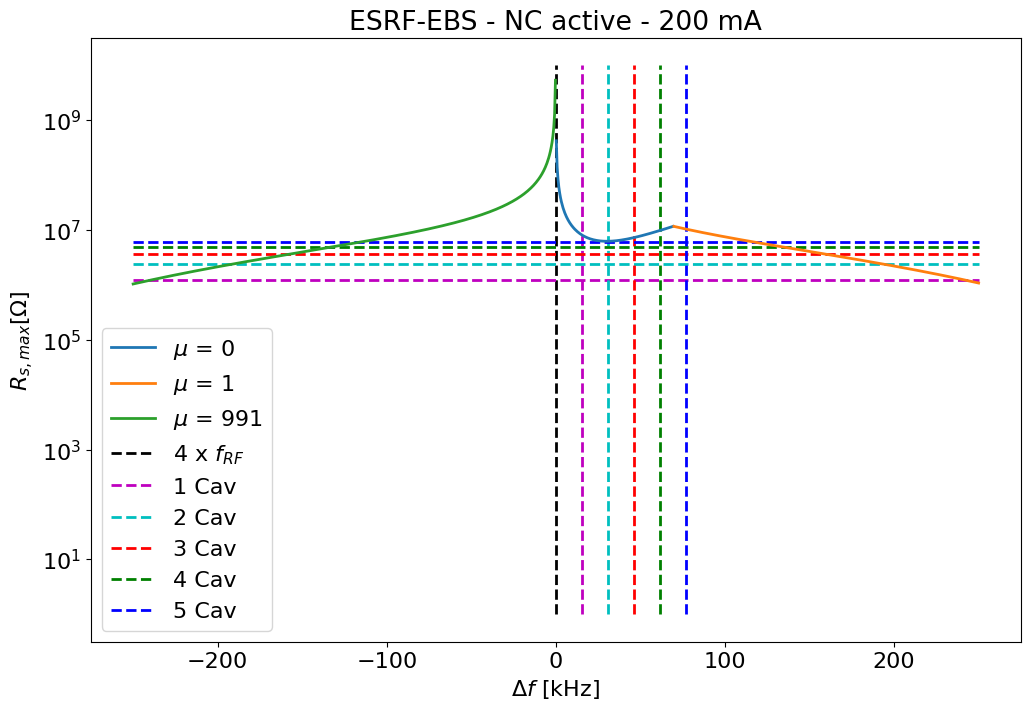

In [9]:
fig, ax = plt.subplots()
mu_vals = np.unique(mu)
idx = np.zeros((len(mu_vals),len(flin)),dtype=bool)
for i, val in enumerate(mu_vals):
    idx[i,:] = val == mu
    ax.plot((flin[idx[i,:]] - ring.f1*m)*1e-3, Rth[idx[i,:]], label="$\mu$ = " + str(int(val)))

ax.vlines(0, 1, 1e10, label="4 x $f_{RF}$", colors="k", linestyles = "dashed")

colors = ["m","c","r","g","b"]
Ncav_list = [1,2,3,4,5]
for i, Ncav in enumerate(Ncav_list):
  ax.hlines(Rs/(1+HHC.beta)*Ncav, (flin.min() - ring.f1*m)*1e-3, (flin.max() - ring.f1*m)*1e-3, label=str(Ncav) + " Cav", colors=colors[i], linestyles = "dashed")
  HHC = CavityResonator(ring, m, Rs, Q, QL, detune, Ncav)
  HHC.Vc = Vc/m
  HHC.theta = -1*np.arctan(m*np.tan(theta))
  HHC.set_optimal_detune(I0)
  HHC.set_generator(I0)
  ax.vlines((HHC.fr - m*ring.f1)*1e-3, 1, 1e10, colors=colors[i], linestyles = "dashed")

ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend()
plt.yscale("log")
plt.xlabel(r"$\Delta f$ [kHz]")
plt.ylabel(r"$R_{s,max} [\Omega]$")
plt.title("ESRF-EBS - NC active - 200 mA")

# 40 mA - 4 bunch

In [10]:
ring = ESRF_EBS()
Vc = 6.5e6
theta = np.arccos(ring.U0/Vc)
I0 = 0.04
HHC = CavityResonator(ring, m, Rs, Q, QL, detune)

In [11]:
flin = np.linspace(ring.f1*4 - 100e3, ring.f1*4 + 100e3, int(1e3))
Rth = np.zeros_like(flin)
mu = np.zeros_like(flin)

for i, fr in enumerate(flin):
    growth_rate, mu[i], growth_rates = lcbi_growth_rate(ring, I=I0, Vrf=Vc, fr=fr, Rs=Rs, QL=QL, M=ring.h)
    Rth[i] = Rs/(growth_rate*ring.tau[2])

Text(0.5, 1.0, 'ESRF-EBS - NC active - 40 mA')

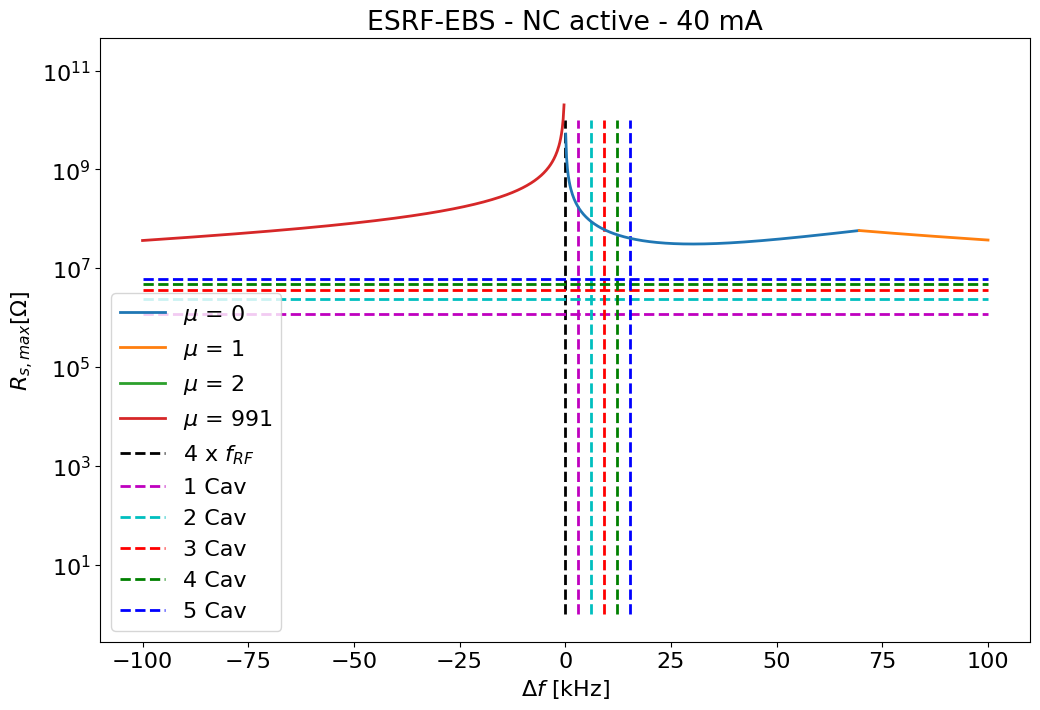

In [12]:
fig, ax = plt.subplots()
mu_vals = np.unique(mu)
idx = np.zeros((len(mu_vals),len(flin)),dtype=bool)
for i, val in enumerate(mu_vals):
    idx[i,:] = val == mu
    ax.plot((flin[idx[i,:]] - ring.f1*m)*1e-3, Rth[idx[i,:]], label="$\mu$ = " + str(int(val)))

ax.vlines(0, 1, 1e10, label="4 x $f_{RF}$", colors="k", linestyles = "dashed")

colors = ["m","c","r","g","b"]
Ncav_list = [1,2,3,4,5]
for i, Ncav in enumerate(Ncav_list):
  ax.hlines(Rs/(1+HHC.beta)*Ncav, (flin.min() - ring.f1*m)*1e-3, (flin.max() - ring.f1*m)*1e-3, label=str(Ncav) + " Cav", colors=colors[i], linestyles = "dashed")
  HHC = CavityResonator(ring, m, Rs, Q, QL, detune, Ncav)
  HHC.Vc = Vc/m
  HHC.theta = -1*np.arctan(m*np.tan(theta))
  HHC.set_optimal_detune(I0)
  HHC.set_generator(I0)
  ax.vlines((HHC.fr - m*ring.f1)*1e-3, 1, 1e10, colors=colors[i], linestyles = "dashed")

ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend()
plt.yscale("log")
plt.xlabel(r"$\Delta f$ [kHz]")
plt.ylabel(r"$R_{s,max} [\Omega]$")
plt.title("ESRF-EBS - NC active - 40 mA")